In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [2]:
#inport data

In [3]:
X,y = load_boston()['data'], load_boston()['target']

In [4]:
X.shape, y.shape

((506, 13), (506,))

In [5]:
#1.create simple SG

In [6]:
class simple_gd(object):
    
    def __init__(self, eta = 0.005, n_iters = 10, val_size = 0.2, lambda_ = 0.95):
        self.eta = eta
        self.n_iters = n_iters
        self.val_size = val_size
        self.lambda_ = lambda_
        
    def fit(self,X,y):
        #generate firstly train and val data
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = self.val_size)
        self.m_ = len(X_train)
        #initialize the theta matrix
        theta = np.random.randn(X_train.shape[1],1)
        #create container for gathering error
        error_cont = []
        self.val_error_cont = []
        #loop until iter
        print(f'operation starts now for {self.n_iters} epochs')
        self.i = 0        
        while(self.i!= self.n_iters):
            print('-'*10)
            y_pred  = np.dot(X_train,theta)
            error = self.mae_cal(y_pred,y_train, m = len(y_train))
            val_error = self.mae_cal(np.dot(X_test,theta),y_test, m=len(y_test) )
            error_cont.append(int(error))
            self.val_error_cont.append(int(val_error))
            # derivative of loss and new theta
            grads = np.dot(X_train.T,(np.dot(X_train,theta)-y_train)) *(2/self.m_) + self.lambda_ * np.sign(theta) * (2/self.m_)
            theta -= self.eta * grads
            print(f'epoch:{self.i+1}--estimated_error:{error}--val_eror:{val_error}')    
            df = pd.DataFrame(error_cont, columns=['train_error'])
            df['val_error'] = self.val_error_cont
            plt.figure(figsize=(10,4))
            plt.plot(df.train_error, 'r',label = 'train')
            plt.plot(df.val_error, 'b', label ='val')
            plt.legend(loc = 'upper right')
            plt.show()
            if self.early_finish():
                break
            self.i += 1
        return theta
        
    def mae_cal(self,y_pred,y_true, m):
        return sum(abs(y_pred - y_true))/m
    
    def early_finish(self,be_cool = 100):
        if self.i > be_cool:
            if self.val_error_cont[-10]/self.val_error_cont[-1] < 1.00005:
                print('early stopping is activated')
                return True
            
            

In [7]:
beta_values = [0.5,0.6,0.7,0.8,0.9,0.95,0.99,0.99999]
store_theta1 = []
store_theta2 = []

operation starts now for 5000 epochs
----------
epoch:1--estimated_error:[113.2027061]--val_eror:[118.50464859]


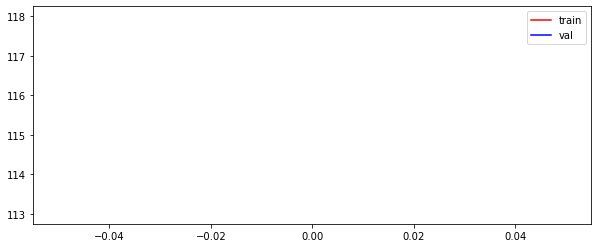

----------
epoch:2--estimated_error:[107.44121451]--val_eror:[112.37365355]


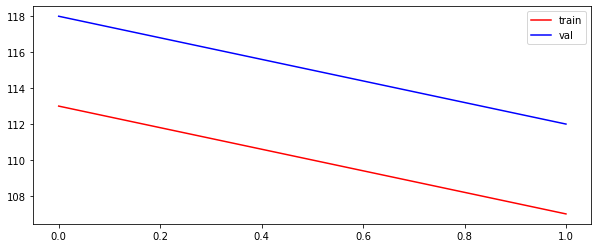

----------
epoch:3--estimated_error:[102.35513846]--val_eror:[106.88513553]


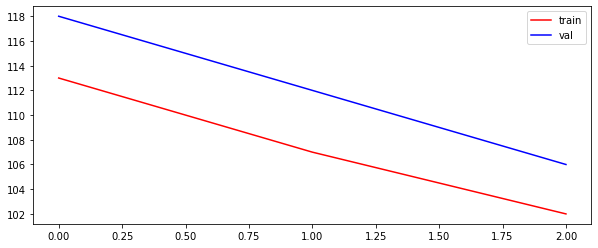

----------
epoch:4--estimated_error:[97.65338085]--val_eror:[101.78529758]


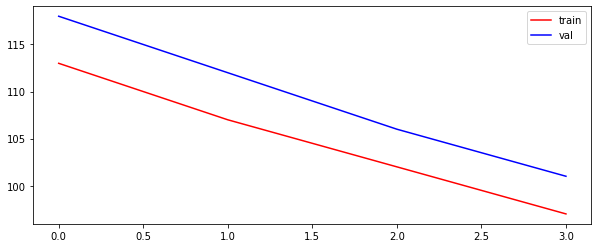

----------
epoch:5--estimated_error:[93.24095552]--val_eror:[96.972765]


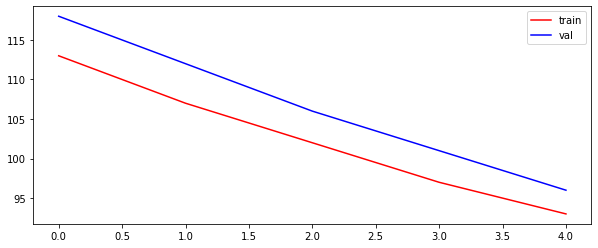

----------
epoch:6--estimated_error:[89.0900956]--val_eror:[92.40317389]


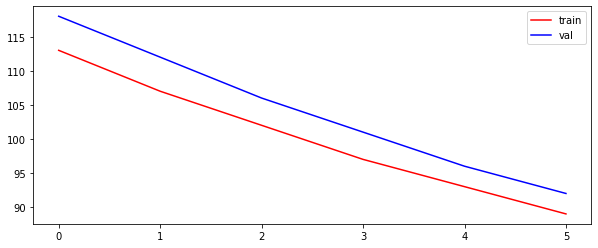

----------
epoch:7--estimated_error:[85.14030362]--val_eror:[88.05367319]


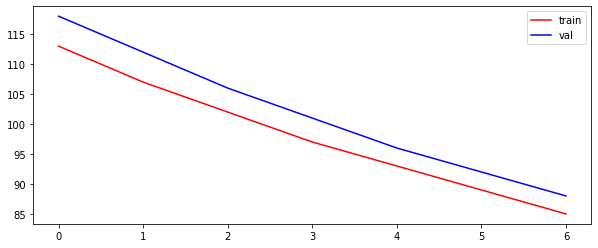

----------
epoch:8--estimated_error:[81.38337406]--val_eror:[83.91704331]


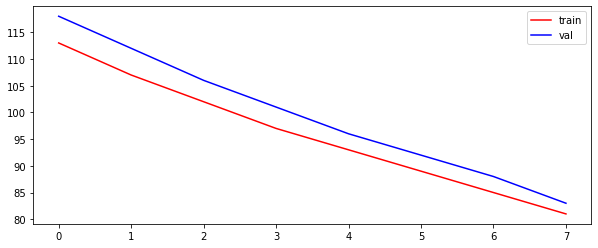

----------
epoch:9--estimated_error:[77.8175411]--val_eror:[79.99886833]


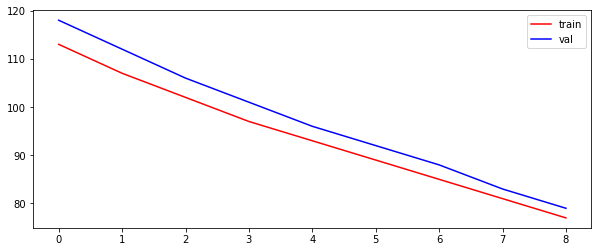

----------
epoch:10--estimated_error:[74.42989369]--val_eror:[76.26826401]


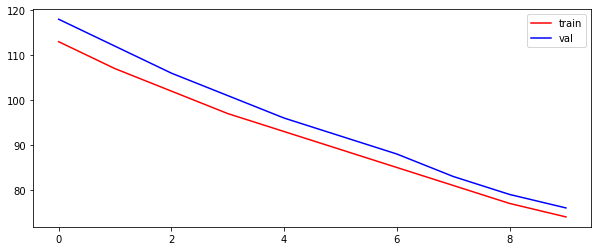

----------
epoch:11--estimated_error:[71.20918853]--val_eror:[72.72366409]


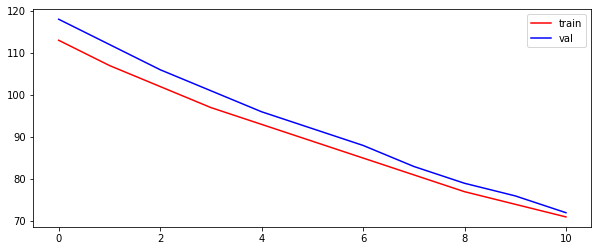

----------
epoch:12--estimated_error:[68.14559107]--val_eror:[69.36824733]


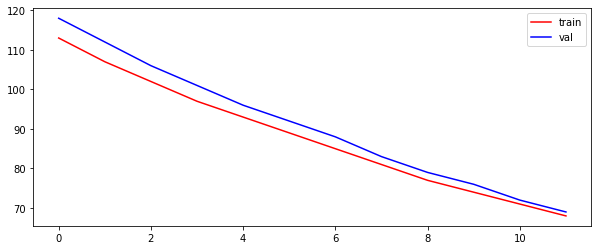

----------
epoch:13--estimated_error:[65.26668153]--val_eror:[66.16939405]


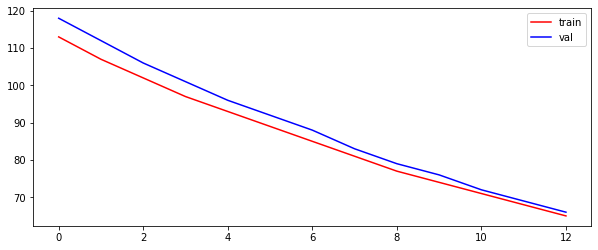

----------
epoch:14--estimated_error:[62.55890788]--val_eror:[63.1197861]


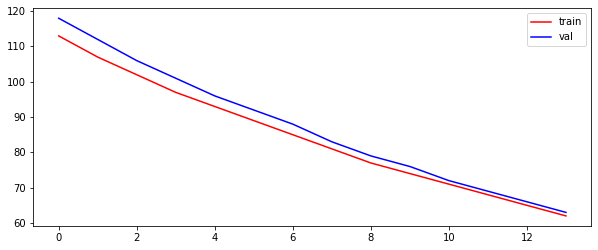

----------
epoch:15--estimated_error:[60.00009474]--val_eror:[60.21782373]


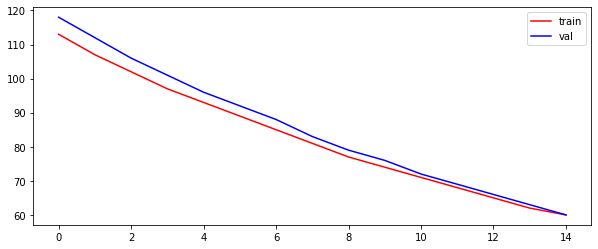

----------
epoch:16--estimated_error:[57.57735713]--val_eror:[57.52143103]


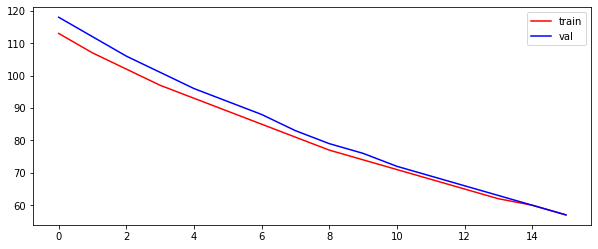

----------
epoch:17--estimated_error:[55.28228266]--val_eror:[54.98339974]


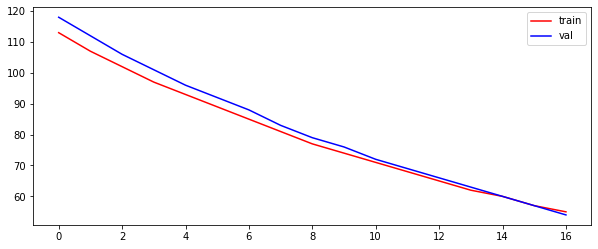

----------
epoch:18--estimated_error:[53.11932211]--val_eror:[52.56362293]


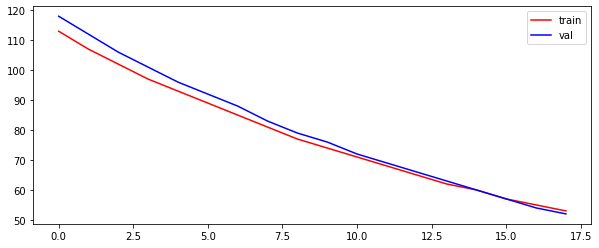

----------
epoch:19--estimated_error:[51.08484754]--val_eror:[50.26868223]


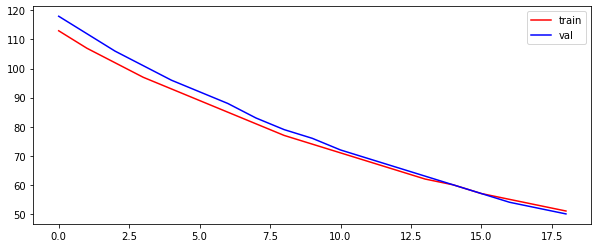

----------
epoch:20--estimated_error:[49.16962579]--val_eror:[48.11333292]


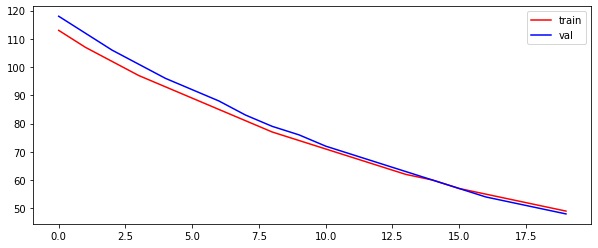

----------
epoch:21--estimated_error:[47.35975198]--val_eror:[46.07246385]


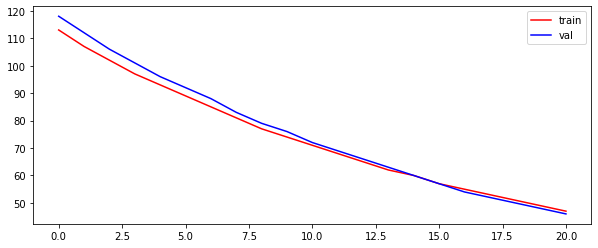

----------
epoch:22--estimated_error:[45.63386155]--val_eror:[44.16617385]


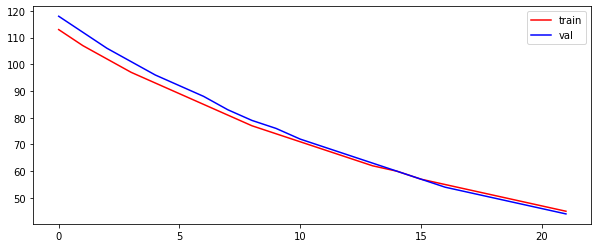

----------
epoch:23--estimated_error:[44.01234384]--val_eror:[42.39886945]


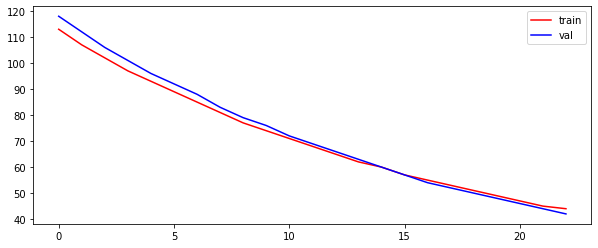

----------
epoch:24--estimated_error:[42.49345882]--val_eror:[40.75323655]


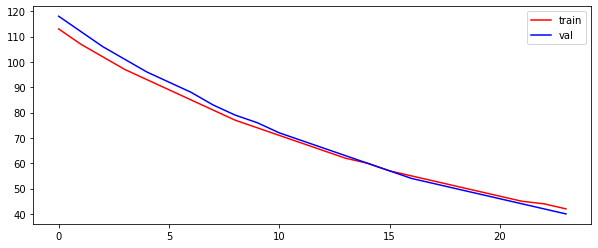

----------
epoch:25--estimated_error:[41.0829735]--val_eror:[39.23084782]


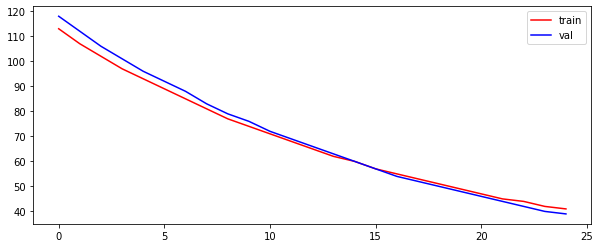

----------
epoch:26--estimated_error:[39.77179332]--val_eror:[37.85763757]


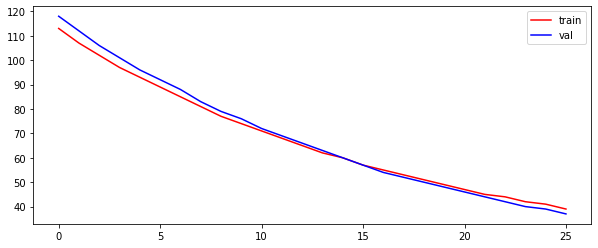

----------
epoch:27--estimated_error:[38.55129309]--val_eror:[36.57761058]


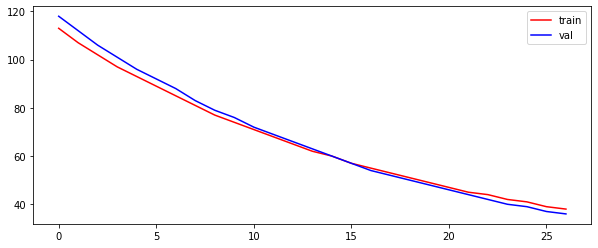

----------
epoch:28--estimated_error:[37.41155182]--val_eror:[35.38877331]


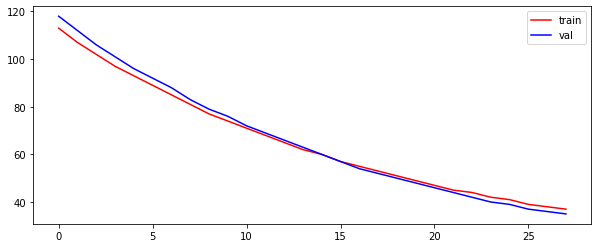

----------
epoch:29--estimated_error:[36.33661232]--val_eror:[34.25484957]


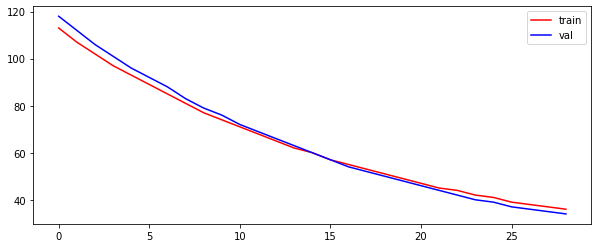

----------
epoch:30--estimated_error:[35.3271972]--val_eror:[33.17450797]


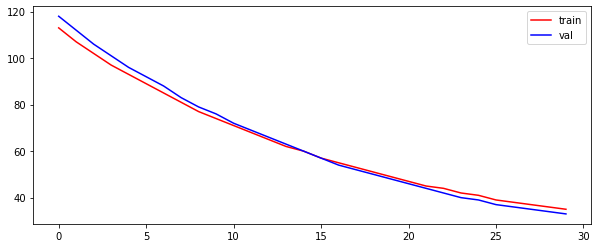

----------
epoch:31--estimated_error:[34.37533828]--val_eror:[32.20420541]


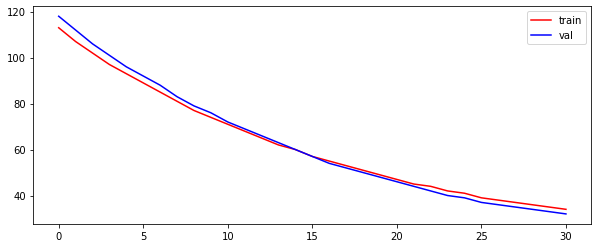

----------
epoch:32--estimated_error:[33.47290765]--val_eror:[31.32292302]


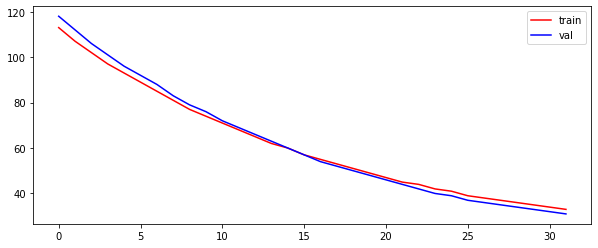

----------
epoch:33--estimated_error:[32.61262694]--val_eror:[30.50570512]


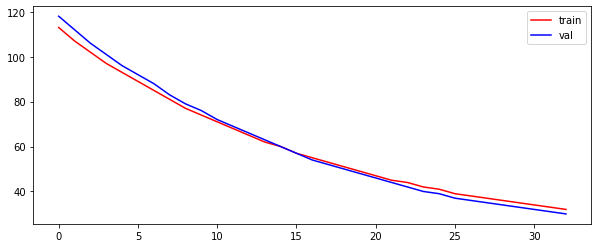

----------
epoch:34--estimated_error:[31.79570715]--val_eror:[29.76736942]


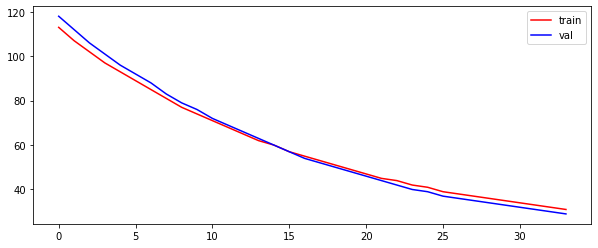

----------
epoch:35--estimated_error:[31.02315095]--val_eror:[29.07093105]


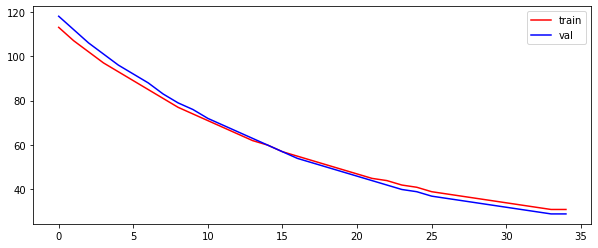

----------
epoch:36--estimated_error:[30.2898196]--val_eror:[28.40635382]


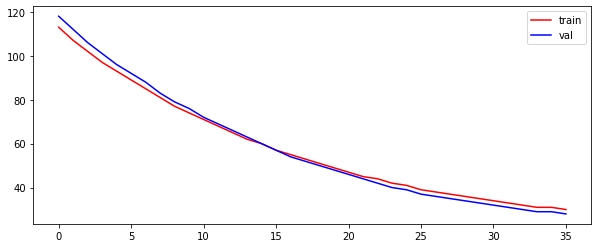

----------
epoch:37--estimated_error:[29.61319672]--val_eror:[27.792652]


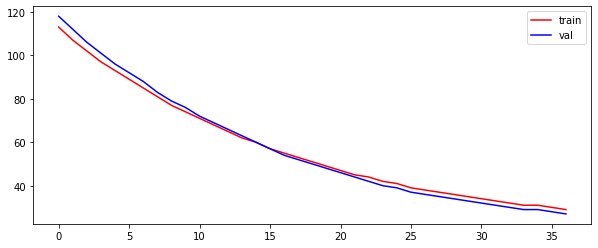

----------
epoch:38--estimated_error:[28.97661327]--val_eror:[27.24907499]


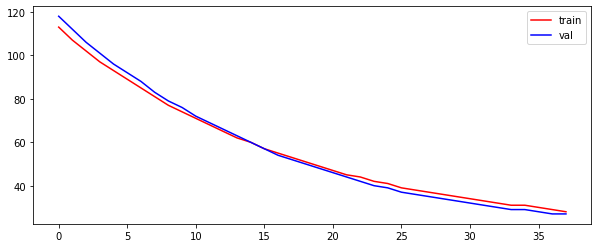

----------
epoch:39--estimated_error:[28.37803793]--val_eror:[26.74220307]


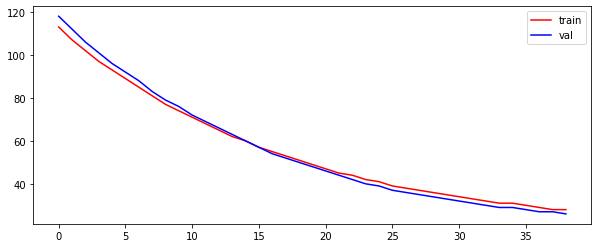

----------
epoch:40--estimated_error:[27.80815806]--val_eror:[26.28369504]


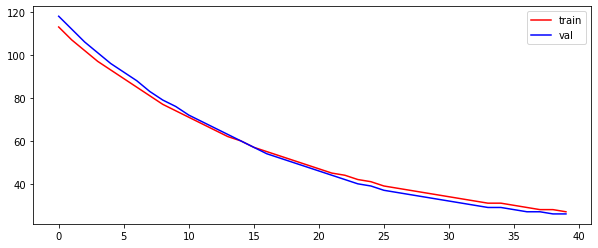

----------
epoch:41--estimated_error:[27.28007766]--val_eror:[25.86140348]


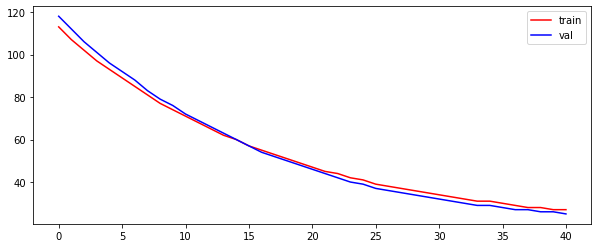

----------
epoch:42--estimated_error:[26.78477535]--val_eror:[25.45814471]


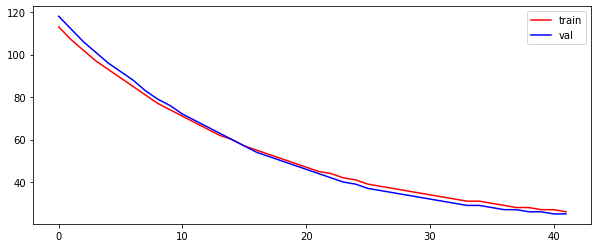

----------
epoch:43--estimated_error:[26.3257564]--val_eror:[25.07303142]


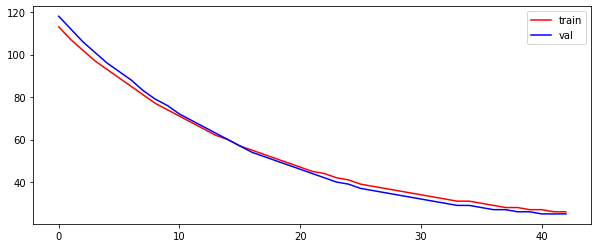

----------
epoch:44--estimated_error:[25.89453623]--val_eror:[24.70619247]


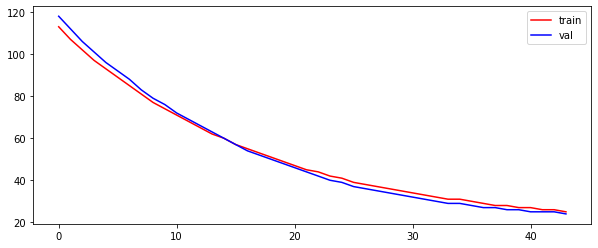

----------
epoch:45--estimated_error:[25.48663167]--val_eror:[24.36534064]


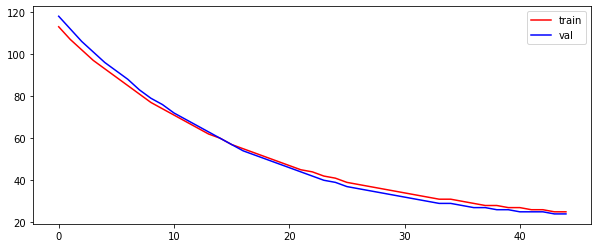

----------
epoch:46--estimated_error:[25.11026582]--val_eror:[24.04147136]


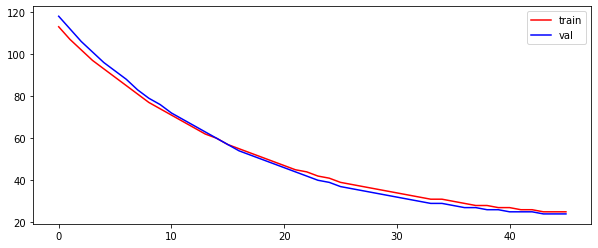

----------
epoch:47--estimated_error:[24.75539194]--val_eror:[23.74566376]


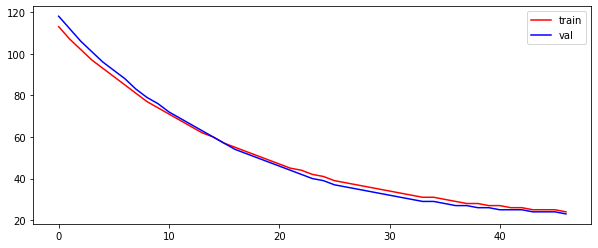

----------
epoch:48--estimated_error:[24.41860869]--val_eror:[23.46300763]


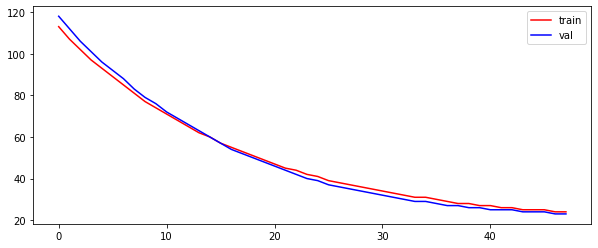

----------
epoch:49--estimated_error:[24.10577096]--val_eror:[23.19289015]


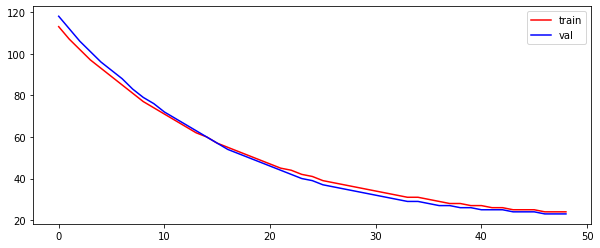

----------
epoch:50--estimated_error:[23.81408826]--val_eror:[22.93511824]


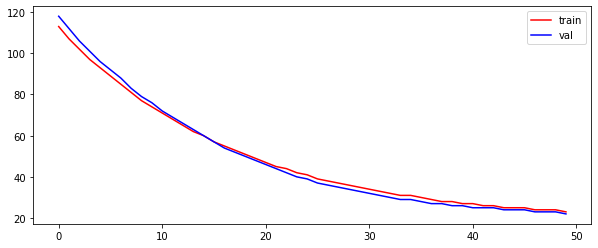

----------
epoch:51--estimated_error:[23.53906724]--val_eror:[22.69643436]


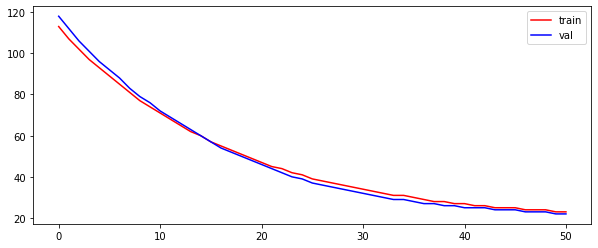

----------
epoch:52--estimated_error:[23.27688373]--val_eror:[22.46823554]


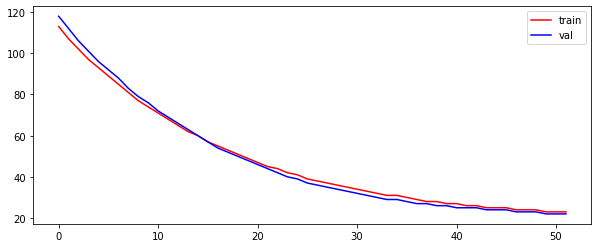

----------
epoch:53--estimated_error:[23.03121177]--val_eror:[22.25003341]


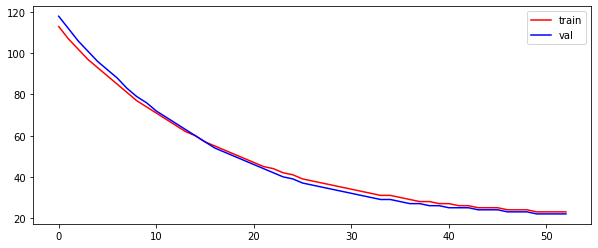

----------
epoch:54--estimated_error:[22.80300707]--val_eror:[22.04622753]


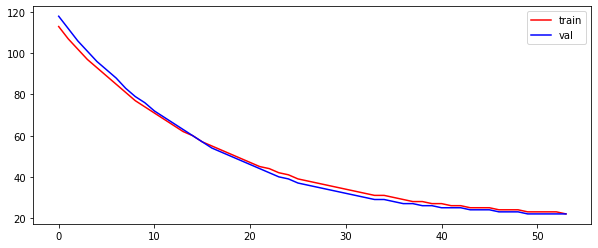

----------
epoch:55--estimated_error:[22.58630594]--val_eror:[21.86115467]


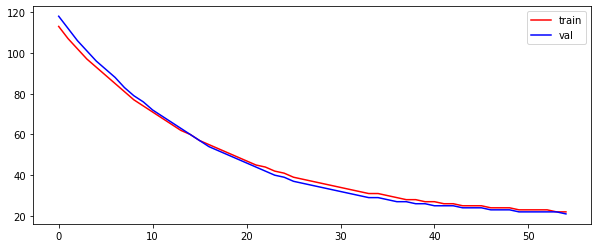

----------
epoch:56--estimated_error:[22.38085576]--val_eror:[21.68889238]


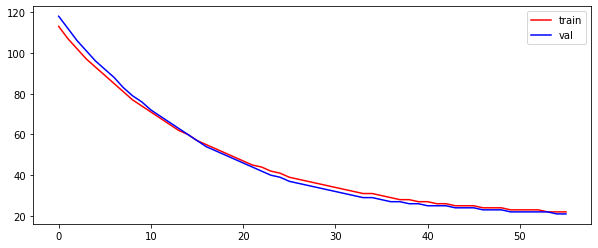

----------
epoch:57--estimated_error:[22.18444392]--val_eror:[21.52649942]


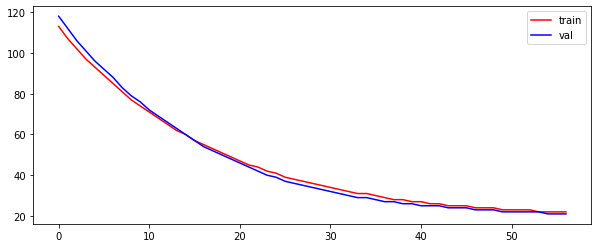

----------
epoch:58--estimated_error:[21.99988816]--val_eror:[21.37174864]


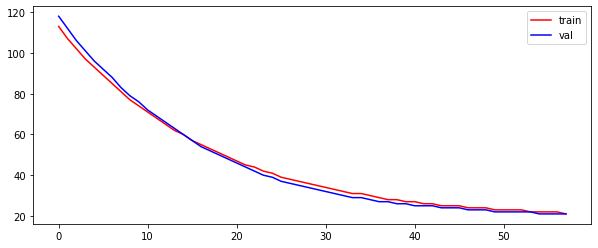

----------
epoch:59--estimated_error:[21.82679716]--val_eror:[21.23199251]


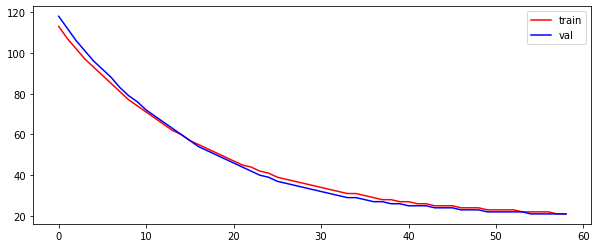

----------
epoch:60--estimated_error:[21.66245609]--val_eror:[21.09967772]


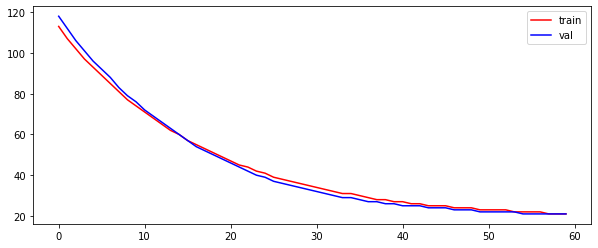

----------
epoch:61--estimated_error:[21.50992003]--val_eror:[20.97290538]


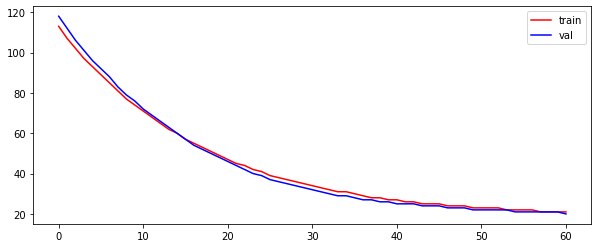

----------
epoch:62--estimated_error:[21.36850412]--val_eror:[20.85141779]


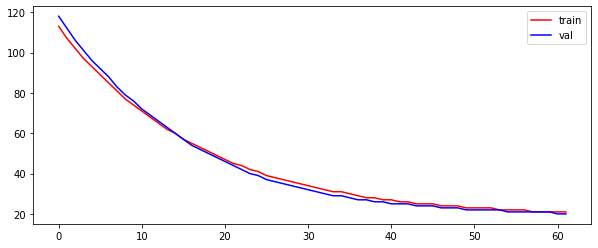

----------
epoch:63--estimated_error:[21.23631869]--val_eror:[20.73496928]


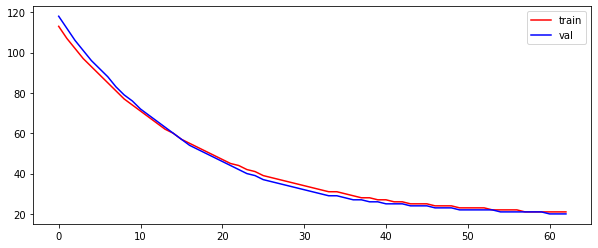

----------
epoch:64--estimated_error:[21.12044129]--val_eror:[20.62495076]


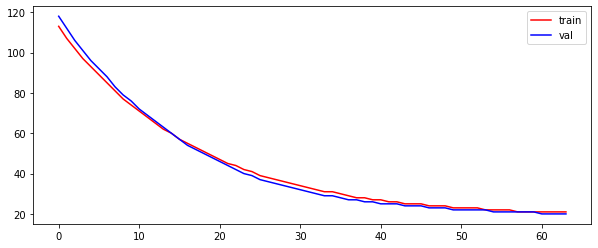

----------
epoch:65--estimated_error:[21.01410734]--val_eror:[20.52450267]


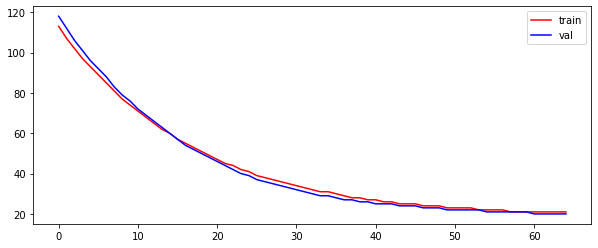

----------
epoch:66--estimated_error:[20.91278571]--val_eror:[20.43098451]


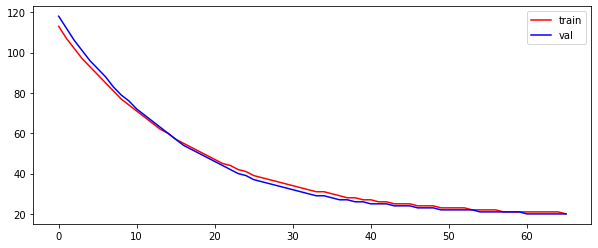

----------
epoch:67--estimated_error:[20.81542766]--val_eror:[20.34739538]


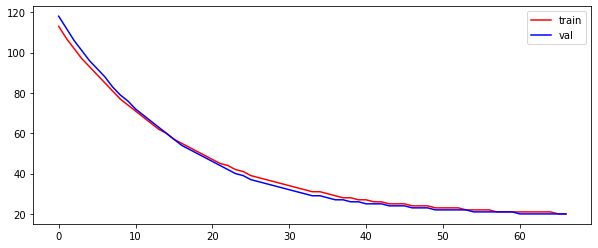

----------
epoch:68--estimated_error:[20.72551391]--val_eror:[20.26706914]


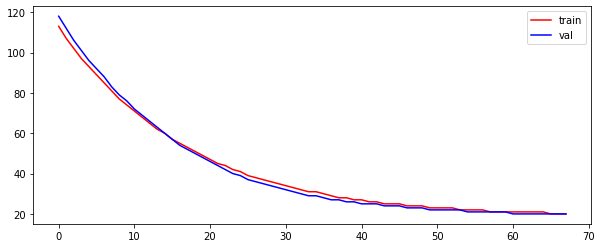

----------
epoch:69--estimated_error:[20.6441192]--val_eror:[20.19014441]


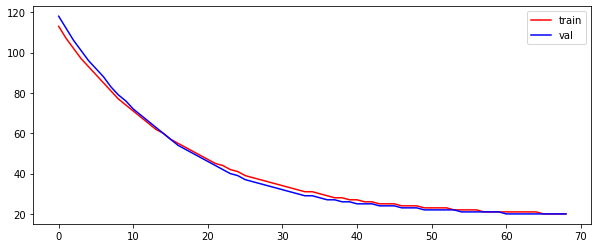

----------
epoch:70--estimated_error:[20.56753783]--val_eror:[20.12337699]


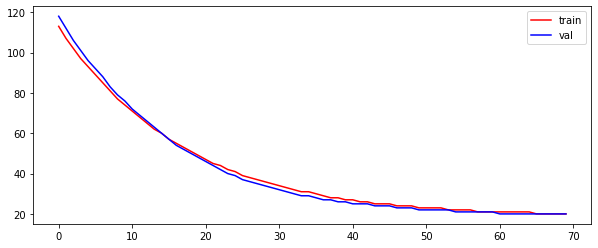

----------
epoch:71--estimated_error:[20.49377201]--val_eror:[20.06673547]


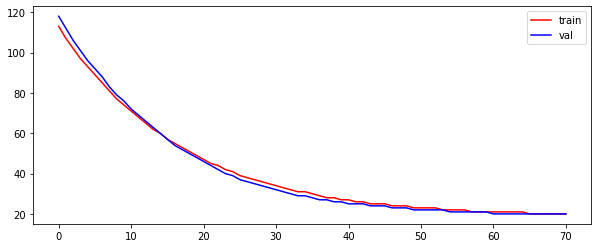

----------
epoch:72--estimated_error:[20.42371446]--val_eror:[20.01207965]


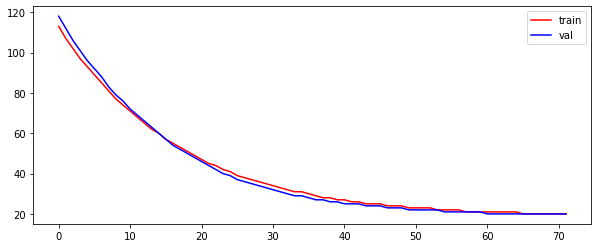

----------
epoch:73--estimated_error:[20.35748579]--val_eror:[19.95931788]


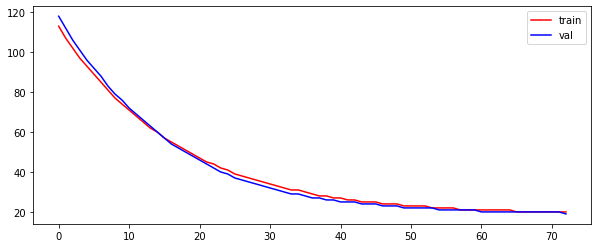

----------
epoch:74--estimated_error:[20.2941658]--val_eror:[19.90971845]


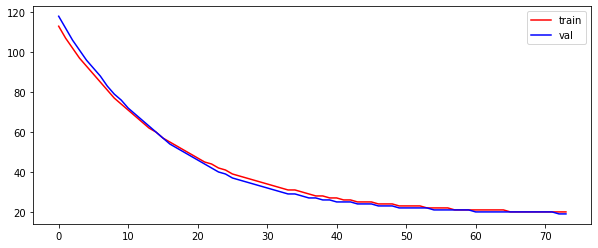

----------
epoch:75--estimated_error:[20.23303927]--val_eror:[19.8639212]


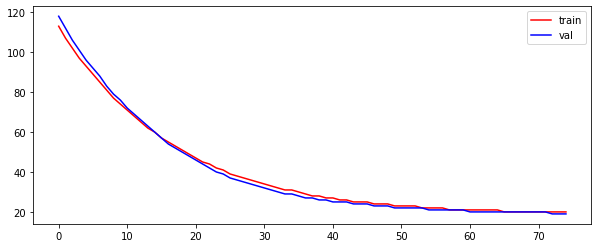

----------
epoch:76--estimated_error:[20.17602504]--val_eror:[19.81961095]


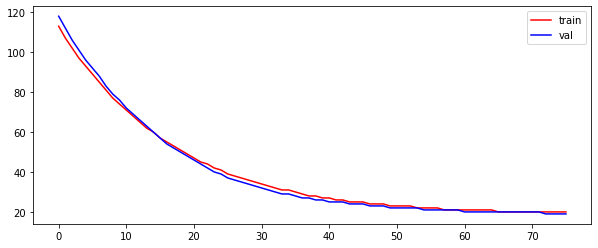

----------
epoch:77--estimated_error:[20.12379982]--val_eror:[19.77671931]


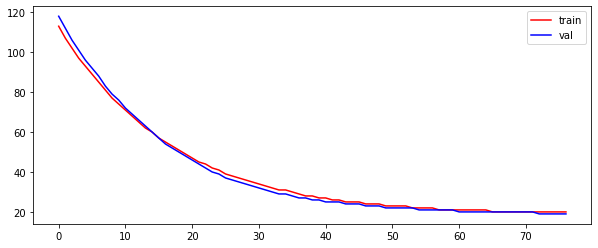

----------
epoch:78--estimated_error:[20.07425787]--val_eror:[19.7351811]


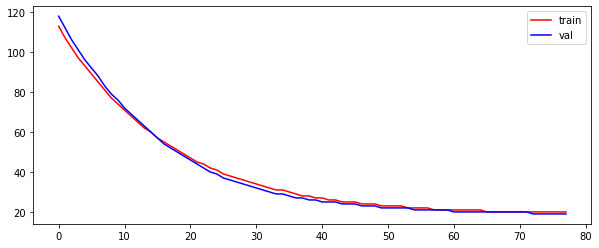

----------
epoch:79--estimated_error:[20.02772817]--val_eror:[19.69707737]


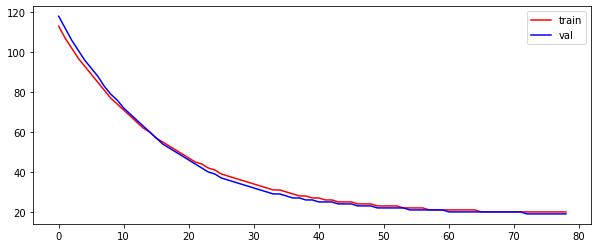

----------
epoch:80--estimated_error:[19.98363271]--val_eror:[19.66072415]


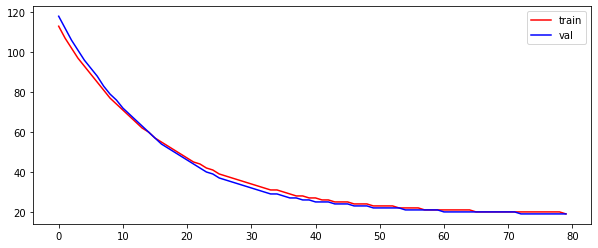

----------
epoch:81--estimated_error:[19.94272113]--val_eror:[19.6262423]


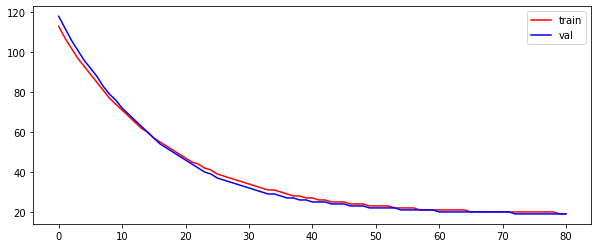

----------
epoch:82--estimated_error:[19.90299323]--val_eror:[19.59415603]


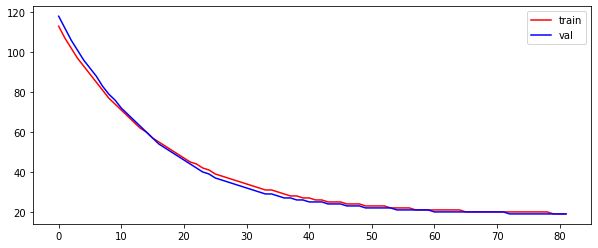

----------
epoch:83--estimated_error:[19.86582851]--val_eror:[19.56345577]


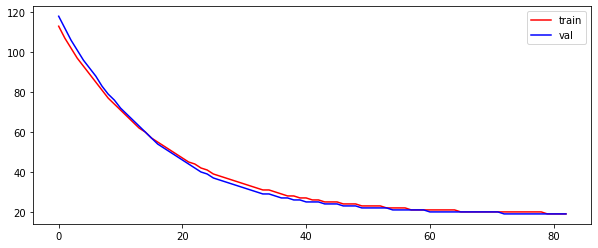

----------
epoch:84--estimated_error:[19.8300275]--val_eror:[19.53819363]


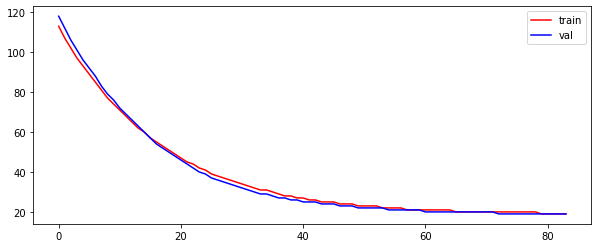

----------
epoch:85--estimated_error:[19.79639599]--val_eror:[19.5134884]


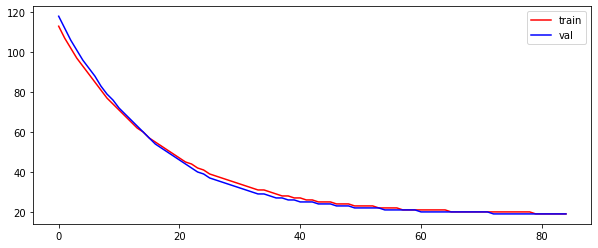

----------
epoch:86--estimated_error:[19.76657235]--val_eror:[19.48931509]


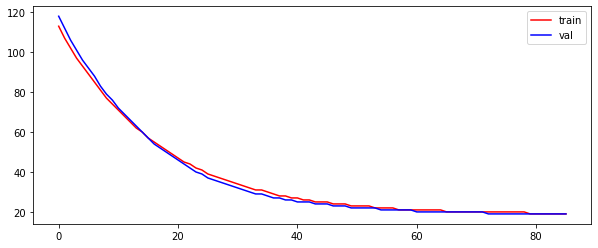

----------
epoch:87--estimated_error:[19.73740647]--val_eror:[19.46564984]


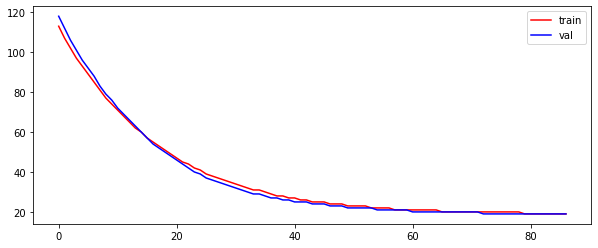

----------
epoch:88--estimated_error:[19.70886884]--val_eror:[19.44246994]


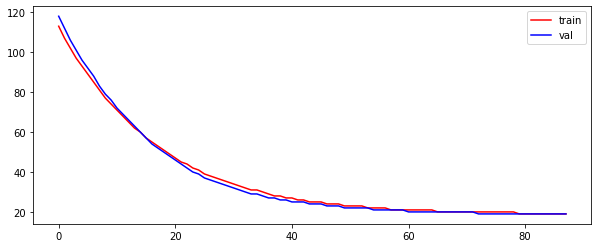

----------
epoch:89--estimated_error:[19.68115944]--val_eror:[19.41975371]


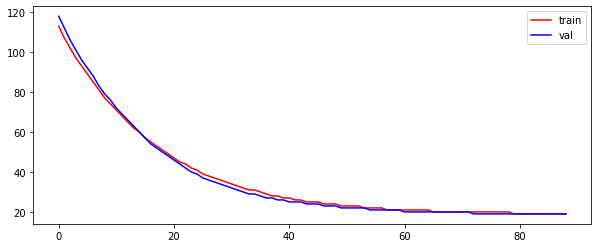

----------
epoch:90--estimated_error:[19.65412449]--val_eror:[19.39748049]


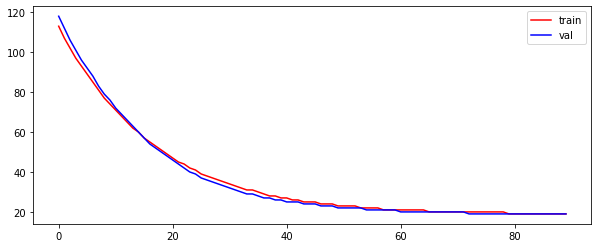

----------
epoch:91--estimated_error:[19.62807947]--val_eror:[19.37632124]


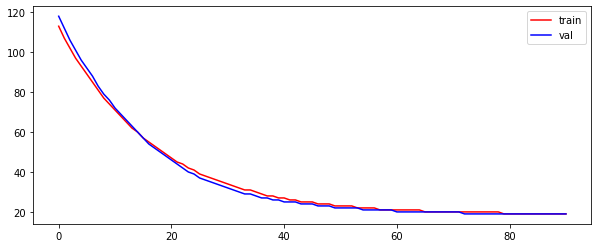

----------
epoch:92--estimated_error:[19.60290378]--val_eror:[19.35617866]


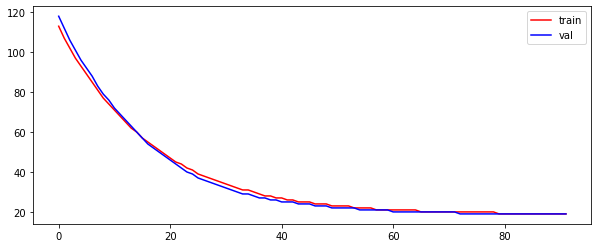

----------
epoch:93--estimated_error:[19.57817964]--val_eror:[19.33634737]


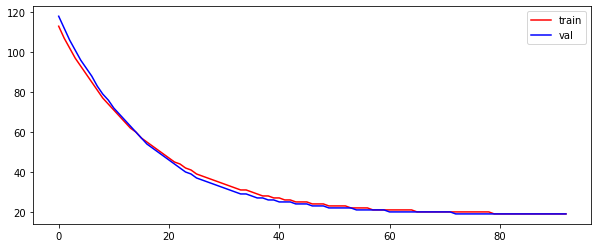

----------
epoch:94--estimated_error:[19.55405855]--val_eror:[19.31681386]


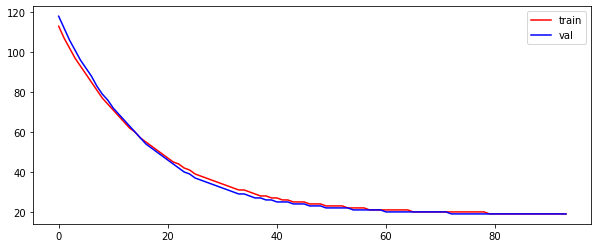

----------
epoch:95--estimated_error:[19.53064917]--val_eror:[19.29756522]


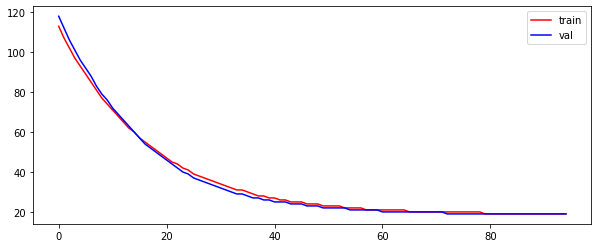

----------
epoch:96--estimated_error:[19.50778839]--val_eror:[19.27858917]


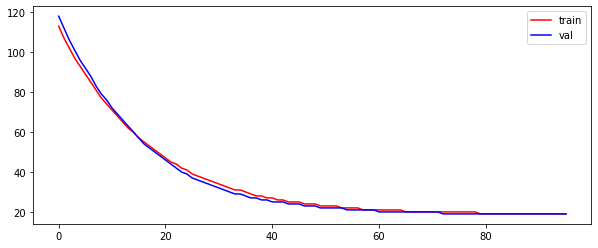

----------
epoch:97--estimated_error:[19.48563772]--val_eror:[19.25987398]


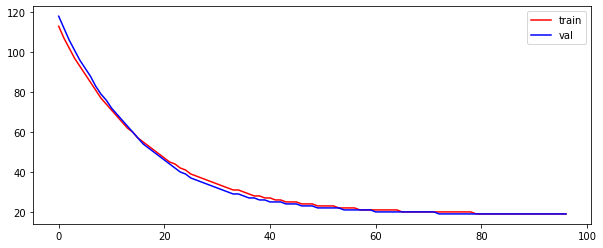

----------
epoch:98--estimated_error:[19.46395406]--val_eror:[19.24140885]


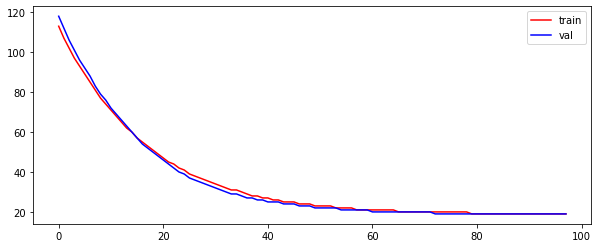

----------
epoch:99--estimated_error:[19.44257193]--val_eror:[19.22318256]


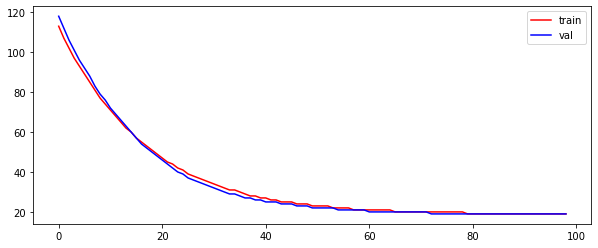

----------
epoch:100--estimated_error:[19.42147827]--val_eror:[19.20518507]


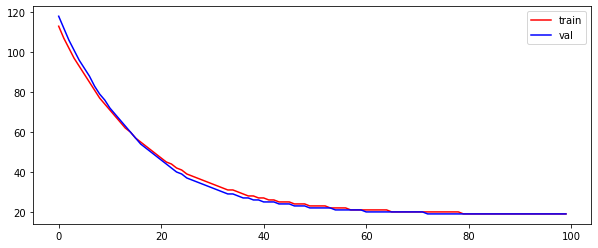

----------
epoch:101--estimated_error:[19.40066072]--val_eror:[19.18740674]


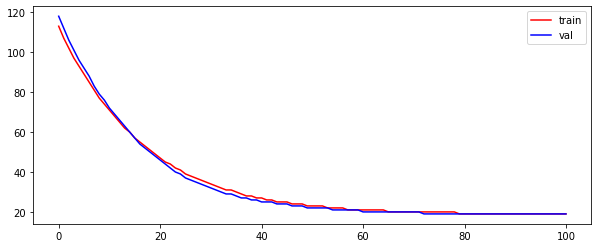

----------
epoch:102--estimated_error:[19.38010751]--val_eror:[19.16983833]


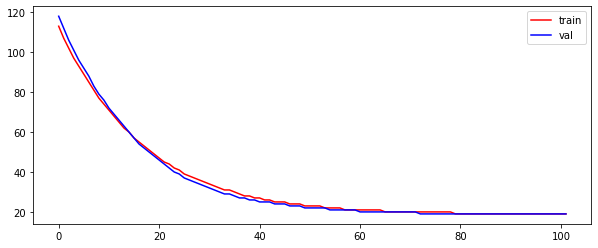

early stopping is activated


In [11]:
theta = simple_gd(eta = 0.000001, n_iters= 5000, lambda_= 0.99).fit(X,y.reshape(-1,1))